   ID number  Diagnosis  mean radius  mean texture  mean perimeter  mean area  \
0     842302          4        17.99         10.38          122.80     1001.0   
1     842517          4        20.57         17.77          132.90     1326.0   
2   84300903          4        19.69         21.25          130.00     1203.0   
3   84348301          4        11.42         20.38           77.58      386.1   
4   84358402          4        20.29         14.34          135.10     1297.0   

   mean smoothness  mean compactness  mean concavity  mean concave points  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  worst radius  worst texture  worst perimet

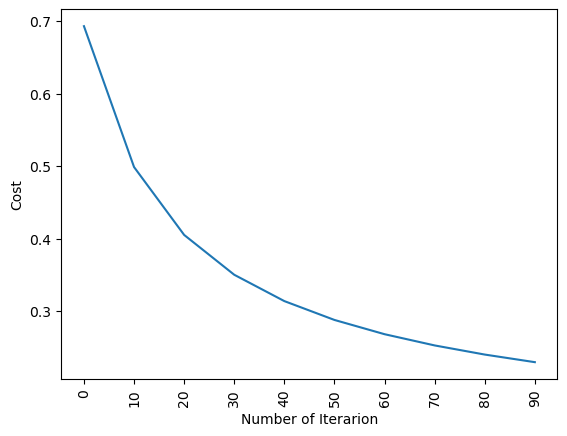

Accuracy of Model: 94.18604651162791 %


In [4]:
import pandas as pd   #library for data-processing
import numpy as np   #lbrary for linear Algebra
import matplotlib.pyplot as plt   #library for plotting graphs
%matplotlib inline

import warnings            # To suppress unnecessary/irrelevant warnings during execution of the code (run-time).
warnings.filterwarnings('ignore')

data = "D:\CDAC Internship 2023\Breast_Cancer_Dataset\wdbc.csv"  # Dataset is in form of a CSV File.   
df = pd.read_csv(data) 
print(df.head())
df.info()
df.Diagnosis = [1 if each == 4 else 0 for each in df.Diagnosis]
print(df.head())

Output = df.Diagnosis.values   # Output -> Category/Class.
Input_Data = df.drop(['Diagnosis','ID number'], axis = 1)  #Input_Data -> Feature Vector (A row of the Dataset).


#Normalisation of the Input Data (Global Maximum and Minimum).
Normalised_Input_Data = (Input_Data - np.min(Input_Data))/(np.max(Input_Data) - np.min(Input_Data)).values


#To split the Data into Training and Testing respectively.
from sklearn.model_selection import train_test_split
Training_Data, Testing_Data, Output_Training_Data, Output_Testing_Data = train_test_split(Normalised_Input_Data, Output, 
                                                                                          test_size = 0.15, random_state = 42)
 
# Transpose of matrices is taken for performing mathematical operations.    
Training_Data = Training_Data.T
Testing_Data = Testing_Data.T
Output_Training_Data = Output_Training_Data.T
Output_Testing_Data = Output_Testing_Data.T
 
print("Training Data: ", Training_Data.shape)
print("Testing Data: ", Testing_Data.shape)
print("Output Training Data: ", Output_Training_Data.shape)
print("Output Testing Data: ", Output_Testing_Data.shape)


def initialize_weights_and_bias(dimension):
    weights = np.full((dimension, 1), 0.01)
    bias = 0.0
    return weights, bias


# Sigmoid function. Input to the function (z) is the (Linear combination of Feature vector and weights + bias) 
def sigmoid(z):
    Predicted_Output = 1/(1 + np.exp(-z))
    return Predicted_Output
    # Predicted Output is a Real Value in the interval [0,1] which gives the probability measure as to how likely the Input 
    # vector lies in class "1". Greater than 0.5 implies class "1" else class "0".


# Learning the values of weights. 
def forward_backward_propagation(weights, bias, Training_Data, Output_Training_Data):
    z = np.dot(weights.T, Training_Data) + bias   # feeding linear combination of input vector and weights along with bias term.
    Predicted_Output = sigmoid(z)    # P(Y=1|X) Conditional Probability that the given input vector 'X' belongs to Class '1'. 
    # Binary Entropy Cross Function (For evaluating the cost function)
    loss = - Output_Training_Data * np.log(Predicted_Output) - (1 - Output_Training_Data) * np.log(1 - Predicted_Output)
    # Cost Function (Should be as low as possible).
    cost = (np.sum(loss)) / Training_Data.shape[1]     
 
    # Backward Propagation
    derivative_weight = (np.dot(Training_Data, ((Predicted_Output - Output_Training_Data).T))) / Training_Data.shape[1]
    derivative_bias = np.sum(Predicted_Output - Output_Training_Data) / Training_Data.shape[1]                
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    return cost, gradients


# Updating values of weights according to the loss function to get better results.
def update(weights, bias, Training_Data, Output_Training_Data, learning_rate, number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
 
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost, gradients = forward_backward_propagation(weights, bias, Training_Data, Output_Training_Data)
        cost_list.append(cost)
 
        weights = weights - learning_rate * gradients["derivative_weight"]
        bias = bias - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration % i: % f" %(i, cost))
 
    # update(learn) parameters weights and bias
    parameters = {"weight": weights, "bias": bias}
    plt.plot(index, cost_list2)
    plt.xticks(index, rotation ='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list



def predict(weights, bias, Testing_Data):
    z = sigmoid(np.dot(weights.T, Testing_Data)+bias)
    Predicted_Output = np.zeros((1, Testing_Data.shape[1]))
    for i in range(z.shape[1]):
        if z[0, i]<= 0.5:
            Predicted_Output[0, i] = 0
        else:
            Predicted_Output[0, i] = 1
 
    return Predicted_Output


# Logistic Regression Model.
def logistic_regression(Training_Data, Output_Training_Data, Testing_Data, Output_Testing_Data, learning_rate,  num_iterations):
 
    dimension = Training_Data.shape[0]
    weights, bias = initialize_weights_and_bias(dimension)
     
    # num_iterations denotes the number of times we are updating the weights.
    parameters, gradients, cost_list = update(weights, bias, Training_Data, Output_Training_Data, learning_rate, num_iterations)
     
    Prediction_Testing_Data = predict(parameters["weight"], parameters["bias"], Testing_Data)
    Prediction_Training_Data = predict(parameters["weight"], parameters["bias"], Training_Data)
 
    # Train / Test Errors
    #print("Train accuracy: {} %".format(100 - np.mean(np.abs(Prediction_Training_Data - Output_Training_Data)) * 100))
    print("Accuracy of Model: {} %".format(100 - np.mean(np.abs(Prediction_Testing_Data - Output_Testing_Data)) * 100))
    
    
    
logistic_regression(Training_Data, Output_Training_Data, Testing_Data, Output_Testing_Data, learning_rate = 1, 
                    num_iterations = 100)

